In [5]:
#Author: Daniel Reis    Date: october, 2023
import math
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import animation as anim
from matplotlib.widgets import Button, Slider
plt.rc('text', usetex=True)
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Helvetica"
# })
N = 50000

N = N+1
seed = [356778679, 23453579,69382747, 12523529]


$$ x_{n+1} = (a\cdot x_{n} + b)mod~ m$$

In [6]:

#creates a random sample of N numbers and return it as a list
def sample(N, seed):
    #seed = [a,b,m,x_0]. Pseudo-random number generation as X_n = (a*X_{n-1} + b)mod m
    
    sample = [seed[-1]]

    for i in range(N):
        n = (seed[0]*sample[i] + seed[1])%seed[2]
        sample.append(n)
    sample.pop(0)
    return sample


data = sample(N, seed)

#DFT (Discrete fourier transform) calculation using Euler's identity
def DFT(x):
    
    
    n = len(x)
    T = [[],[]]
    for k in range(n):
        re = 0
        im = 0
        for i in range(n):
            re += x[i]*(math.cos(2*math.pi*(k*i)/n))
            im += x[i]*(math.sin(2*math.pi*(k*i)/n))
        T[0].append(re)
        T[1].append(im)

    #Removing the first point because it is always strange
    T[0].pop(0)
    T[1].pop(0)
    
    return T

T = DFT(data)






$$ X_{k} = \sum_{n = 0}^{N-1} x_{n}e^{-i2\pi nk/N} $$

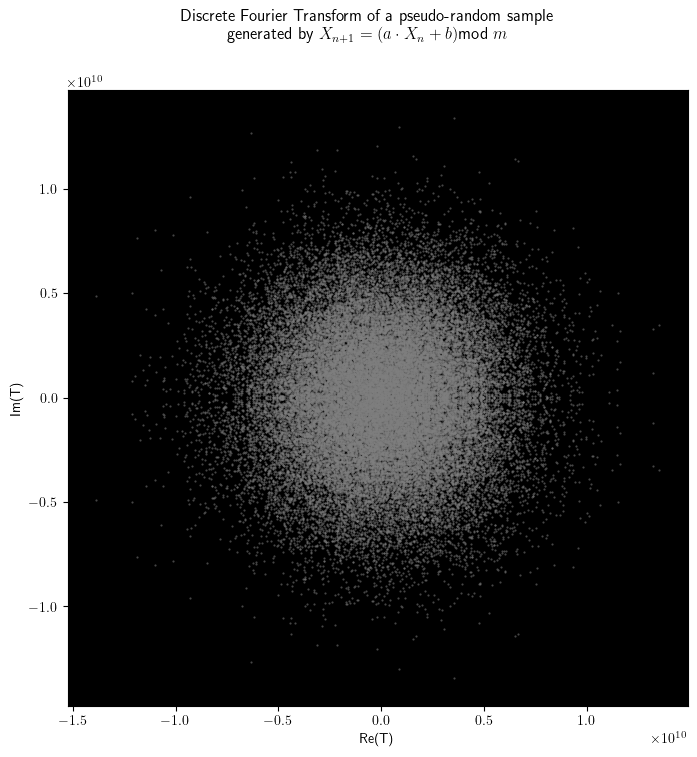

In [10]:
#Sets margin percentage as 1.x and alpha
# margin = 1.1
alp = 0.6
points_color = 'grey'
points_size = 1

#Ploting the calculated transform
fig, ax = plt.subplots(1,1, figsize = (8,8))

# Uncomment the two next lines to see in log-log
# plt.xscale('log')
# plt.yscale('log')
fig.suptitle("Discrete Fourier Transform of a pseudo-random sample\ngenerated by $X_{n+1} = (a\cdot X_{n} + b)$mod $m$")
n = len(T[0])
ax.scatter(T[0], T[1], marker = '.', s=points_size, color = points_color, alpha = alp)
ax.set(ylabel = 'Im(T)')
ax.set(xlabel = 'Re(T)')
ax.set_facecolor("black")


plt.show()

In [8]:
# # ax.set(xlim = [min(T[0]), max(T[0])])
# # ax.set(ylim = [min(T[1]), max(T[1])])
# # adjust the main plot to make room for the sliders
# fig.subplots_adjust(left=0.25, bottom=0.25)
# # Make a horizontal slider to control the frequency.
# axMod = fig.add_axes([0.25, 0.1, 0.65, 0.03])
# amp_slider = Slider(
#     ax=axMod,
#     label='Mod quotient\nvalue',
#     valmin=2,
#     valmax=500,
#     valinit=seed[2],
# )

# # The function to be called anytime a slider's value changes
# def update(val):
#     seed[2] = int(val)
#     T = DFT(sample(N, seed))
#     ax.scatter(T[0], T[1], marker = '.', s=points_size, color = points_color, alpha = alp)
#     # line.set_xdata(T[0])
#     # line.set_ydata(T[1])
#     # ax.set(xlim = [min(T[0]), max(T[0])])
#     # ax.set(ylim = [min(T[1]), max(T[1])])
#     # ax.update_datalim(np.array(T).reshape(N-1,2))
#     fig.canvas.draw_idle()


# # register the update function with each slider

# amp_slider.on_changed(update)

# # Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
# resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
# button = Button(resetax, 'Reset', hovercolor='0.975')


# def reset(event):
#     amp_slider.reset()
# button.on_clicked(reset)
